# Numerov Method.

The Numerov algorithm is a numerical method used to solve second-order differential equations of the form:

y''(x) + k(x) * y(x) = 0

It provides an efficient and accurate way to approximate the solution to such differential equations. The algorithm utilizes a finite difference approximation to iteratively calculate the values of the unknown function y(x) at discrete points on a grid.

Here is a step-by-step explanation of how the Numerov algorithm works:

  Define the grid: First, we need to define a grid of points along the x-axis where we want to calculate the values of the function y(x). These points are evenly spaced with a step size h.

  Initialize the solution: Set the initial conditions for the unknown function y(x) at the starting points of the grid. Usually, the values of y(x) at two neighboring points are required to initiate the algorithm.

  Calculate the potential values: Evaluate the potential function k(x) at each point on the grid. This potential function depends on the specific physical problem being solved.

  Iterate over the grid: Starting from the third point on the grid, perform the following calculations for each point:

   a. Calculate the value of the right-hand side term, which is proportional to the product of the potential function and the previous value of y(x). This term is denoted as g(x) = h^2 * k(x) * y(x).

  b. Use the Numerov recurrence relation to calculate the value of y(x) at the current point. The relation is given by:

  y(i+1) = [2 * (1 - (5/12) * g(i)) * y(i) - (1 + (1/12) * g(i-1)) * y(i-1)] / (1 + (1/12) * g(i+1))

  Here, y(i) represents the value of y(x) at the current point, y(i-1) represents the value at the previous point, and y(i+1) represents the value at the next point.

  Repeat the iteration: Continue the iteration process over the entire grid, calculating the values of y(x) at each point using the Numerov recurrence relation.

  Obtain the solution: Once the iteration is completed, the values of y(x) at all the points on the grid provide an approximation to the solution of the differential equation.

The Numerov algorithm is particularly useful for solving Schrödinger's equation because it provides a high level of accuracy, typically 6th order, while being relatively simple to implement. By utilizing this algorithm, we can numerically solve the Schrödinger equation and obtain the eigenvalues and eigenfunctions associated with a given potential function.

In the provided code, the Numerov algorithm is used within the solve_schrodinger_eq function to solve the Schrödinger equation for different potential functions. It calculates the values of the wavefunction psi at each point on the spatial grid, incorporating the potential energy and the energy guess as inputs to the algorithm.

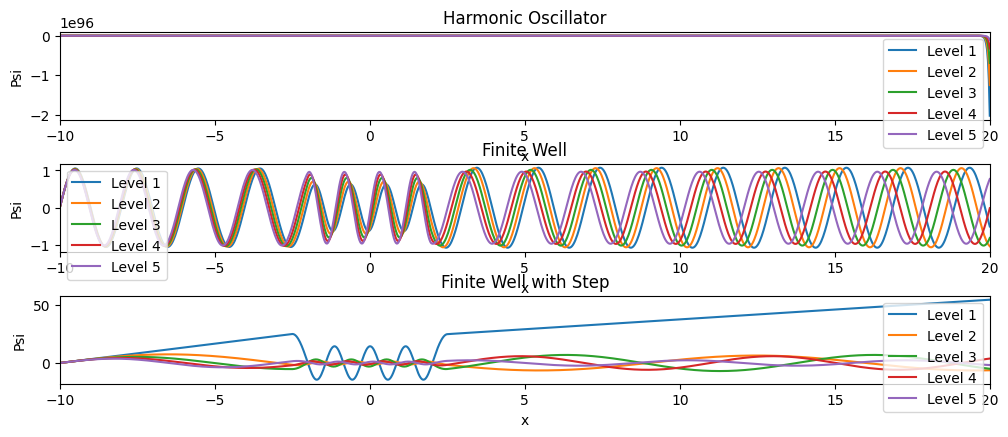

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0  # Particle mass

# Potential functions
def harmonic_oscillator(x):
    return 0.5 * m * omega**2 * x**2

def finite_well(x):
    if abs(x) < a:
        return -V0
    else:
        return 0.0

def finite_well_with_step(x):
    if abs(x) < a:
        return -V0
    elif abs(x) < a + d:
        return 0.0
    else:
        return V1

# Numerical solution using the Numerov method
def solve_schrodinger_eq(potential, energy_guess, x_values, dx):
    N = len(x_values)
    psi = np.zeros(N)
    psi[0] = 0.0  # Initial condition
    psi[1] = 0.1  # Initial condition

    # Calculate the potential values
    V = np.array([potential(x) for x in x_values])

    # Calculate the effective potential
    eff_potential = 2.0 * m * (energy_guess - V)

    for i in range(2, N):
        psi[i] = (2.0 * (1.0 - (5.0 / 12.0) * dx**2 * eff_potential[i-1]) * psi[i-1] -
                  (1.0 + (1.0 / 12.0) * dx**2 * eff_potential[i-2]) * psi[i-2]) / \
                 (1.0 + (1.0 / 12.0) * dx**2 * eff_potential[i])

    return psi

# Set up parameters
omega = 1.0  # Oscillator frequency
V0 = 10.0  # Well depth
a = 2.0  # Width of the well
d = 0.5  # Width of the step in the well with a step potential
V1 = 5.0  # Height of the step potential

# Set up spatial grid
x_start = -10.0
x_end = 20
num_points = 1000
x_values = np.linspace(x_start, x_end, num_points)
dx = x_values[1] - x_values[0]

# Find energy levels and wave functions
energy_levels = []
wave_functions = []

for potential in [harmonic_oscillator, finite_well, finite_well_with_step]:
    energy_guess = 0.5 * V0  # Initial guess for energy
    energies = []
    wave_funcs = []

    while len(energies) < 5:  # Find the first 3 energy levels
        psi = solve_schrodinger_eq(potential, energy_guess, x_values, dx)

        # Check for sign changes in the wave function to detect energy level crossings
        sign_changes = np.where(np.diff(np.sign(psi)))[0]

        # Check if a sign change occurred within the region of interest
        if len(sign_changes) > 0 and x_start < x_values[sign_changes[-1]] < x_end:
            energies.append(energy_guess)
            wave_funcs.append(psi)

        energy_guess += 0.1  # Increase energy guess

    energy_levels.append(energies)
    wave_functions.append(wave_funcs)

# Plotting
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

for i, potential in enumerate(["Harmonic Oscillator", "Finite Well", "Finite Well with Step"]):

    plt.subplot(5, 1, i+1)
    plt.title(potential)
    plt.xlabel("x")
    plt.ylabel("Psi")
    plt.xlim(x_start, x_end)

    for j in range(5):
        plt.plot(x_values, wave_functions[i][j], label=f"Level {j+1}")

    plt.legend()

plt.show()


# WKB method

The provided code implements the WKB (Wentzel-Kramers-Brillouin) approximation to find the energy eigenvalues and wavefunctions for a given potential energy function. Here's an explanation of the code:

  Import necessary libraries: The code imports required libraries such as NumPy, SciPy, and Matplotlib.

  Define the parameters: Specify the variables for the range of x values, the number of points (N), the mass of the particle (m), and Planck's constant (h).

  Define the potential energy function: The function v(x) represents the 
  potential energy as a function of position x. In this code, it is defined as a step potential with a value of 10 at x = -1 and x = 1.

  Define the integral equation: The function integral_equation(E, n) calculates the integral equation to find the energy eigenvalues. It numerically integrates the square root of the kinetic energy term (2 * m * (E - v(x))) over the range of x values.

  Find the energy eigenvalues: The function find_E(n_values) iterates over the desired quantum number values (n) and solves the integral equation using the root function from SciPy. It returns a list of the corresponding energy eigenvalues (E_values).

  Calculate the wavefunctions: The function wave_function(E) calculates the wavefunctions corresponding to the energy eigenvalues. It iterates over the energy values and numerically integrates the square root of the kinetic energy term for each x value up to the current position. The resulting wavefunction is then normalized and stored in psi_values.

  Plot the wavefunctions: The code uses Matplotlib to visualize the real part squared of the wavefunctions (|psi|^2) as a function of x. It loops over the wavefunctions in psi_values and plots them, labeling each plot with the corresponding energy eigenvalue (E).

  Plot the potential energy: The potential energy function, defined in v(x), is also plotted for visualization purposes.

  Set labels and display the plot: The code sets the x-axis and y-axis labels, adjusts the plot limits, adds a legend, and displays the plot using plt.show().

By running this code, you will obtain a plot showing the wavefunctions (squared) for different energy eigenvalues in the specified potential energy function.

<ipython-input-5-5ae5bfe176d2>:53: RuntimeWarning: invalid value encountered in sqrt
  psi = (1 / np.sqrt(2 * m * (energy - v(x)))) * np.exp(1j * integr * 2 * np.pi / h)


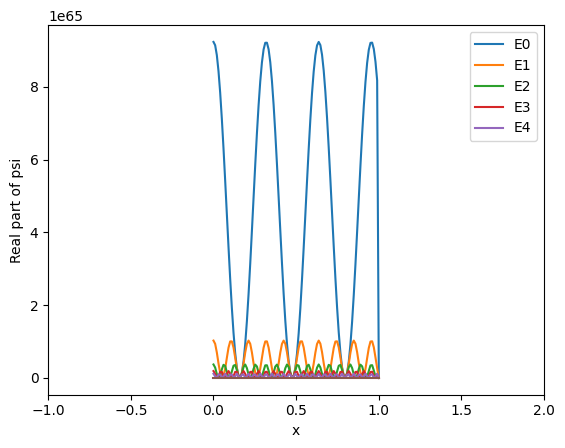

In [5]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import scipy
x1 = 0
x2 = 1
N = 100
x = np.linspace(x1, x2, N)
m = 5
h = 6.62607015e-34

def v(x):
    v = np.zeros_like(x)
    v[np.abs(x) == 1] = 10
    return v

def integral_equation(E, n):
    def integrand(x):
        return np.sqrt(2 * m * (E - v(x)))

    integral, _ = quad(integrand, x1, x2)
    return integral - ((n + 0.5) * np.pi * h)

def find_E(n_values):
    E_values = []
    
    for n in n_values:
        equation = lambda E: integral_equation(E, n)
        sol = root(equation, 0)
        E_solution = sol.x[0]
        E_values.append(E_solution)

    return E_values

def wave_function(E):
    psi_values = []
    psi_values_normal=[]
    for energy in E:
        psi = np.zeros_like(x)
        if energy > 0:
            def integrand(x):
                return np.sqrt(2 * m * (energy - v(x)))
            integr=[]
            for i in x:
              integrall, _ = quad(integrand, x1, i)
              integr.append(integrall)
              
            integr=np.array(integr)
            integr[np.isnan(integr)] = 0.1
            
            psi = (1 / np.sqrt(2 * m * (energy - v(x)))) * np.exp(1j * integr * 2 * np.pi / h)
            psi[np.isnan(psi)] = 0
            normalize_psi=psi/psi.max()
            

            psi_values_normal.append(normalize_psi)
            psi_values.append(psi)


    return psi_values

n_values = np.arange(0, 5)  # Adjust the range as needed
E_values = find_E(n_values)
psi_values = wave_function(E_values)

for i, psi in enumerate(psi_values):

    plt.plot(x ,psi.real**2, label="E{}".format(i))
plt.plot(x,v(x))
plt.xlabel('x')
plt.xlim(-1,2)
plt.ylabel('Real part of psi')
plt.legend()
plt.show()
